# T Tests on Independent Samples

The **T Test** (also called **Student’s T Test**) compares two averages (means | $\mu$) and tells us if they are different from each other. The t test also tells us how **significant** the differences are. In other words it lets us know if those differences could have occurred by chance.

<span style="color : 	#076f00">
A drug company may want to test a new cancer drug to find out if it improves life expectancy. In an experiment, there’s always a control group (a group who are given a placebo). The control group may see an average increased life expectancy of 5 years, while the group taking the new drug might witness an average increase in life expectancy of 6 years. This might indicate that the drug is effective, however that could be down to unique attributes in the sample. To test the efficacy of the drug for the entire population, researchers would have to use a Student’s t test to find out if the results are statistically significant over the whole population.
</span>

### T score
The <span style = "color : red">**T score**</span> or **T value** is a **ratio** between the **difference between two groups** and the **difference within the two groups**.

- **large** t-score $\implies$ groups are **different**.
- **small** t-score $\implies$ groups are **similar**.
    
When we run a t test, the bigger the t value, the more likely it is that the results will be reproducable across the population. That raises the question **how big is big enough?** Every t-value has a <span style = "color : red">**p-value**</span> to go with it. A p-value is the <span style = "color : red"> **probability** that the results from your sample data occurred by chance</span>. P-values range from 0% to 100%.<span style="color : 	#076f00"> a p value of 5% is 0.05</span>. Low p-values are good; They indicate that our data did not occur by chance. <span style="color : 	#076f00"> a p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance</span>. In most cases, a p-value of 0.05 (5%) is accepted to mean that the data is valid. This threshold (0.05 or 0.1) is called the <span style = "color : red"> significance level</span> and is denoted by <span style = "color : red">$\alpha$</span>. $\alpha$ can be 0.05 or 0.1.

### T Test variations

There are three variations of the t-test:

- An <span style = "color : red">**Independent samples** t-test</span> compares the means for two groups.
- A <span style = "color : red">**Paired sample** t-test</span> compares means from the same group at different times (say, one year apart).
- A <span style = "color : red">**One sample** t-test</span> compares the mean of a single group against a known mean.

## Independent Samples T Test

The <span style = "color : red">**Independent samples** t-test</span> helps us to compare the means of two sets of data. We could run a t test to see if <span style = "color : #076f00"> the average test scores of males and females are different</span> and the Independent Samples T Test helps answer whether these differences could have occurred by random chance.

### Loading libraries and dataset

In [1]:
import math
import csv
import time
import seaborn as sn
from scipy import stats
import pandas as pd
from itertools import combinations
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "C:\\Users\\Neil Bardhan\\Desktop\\t test"
start = time.time()
csvFile = path + "\\NMttest.csv"
with open(csvFile) as fp:
    reader = csv.DictReader(fp)
    data = {}
    for row in reader:
        for header, value in row.items():
            try:
                data[header].append(value)
            except KeyError:
                data[header] = [value]
    for key, value in data.items():
        data[key] = list(filter(None, data[key]))
        data[key] = list(map(lambda x: float(x), data[key]))
    #print("Time to read file ->", round(time.time() - start, 3), "seconds.\n")
    t = PrettyTable(data.keys())
    df = pd.DataFrame.from_dict(data, orient='index').transpose()
    for index, row in df.iterrows():
        t.add_row(row)
    print(t)

+--------------+--------------+--------------+--------------+--------------+
| shiftClass31 | shiftClass32 | shiftClass22 | shiftClass23 | shiftClass21 |
+--------------+--------------+--------------+--------------+--------------+
|   109.126    |   487.797    |   653.745    |   590.035    |   524.996    |
|   446.973    |   697.996    |   346.847    |   506.485    |   587.324    |
|    79.898    |   511.413    |   516.717    |   375.336    |   630.496    |
|   542.809    |   517.957    |   332.523    |   586.754    |   539.347    |
|   531.114    |   379.899    |   532.259    |   580.948    |   500.332    |
|   597.148    |   601.309    |   541.533    |   539.804    |   283.492    |
|   180.683    |   644.818    |    600.35    |   554.802    |   372.994    |
|   680.899    |   541.401    |   578.415    |   474.639    |   552.625    |
|   124.991    |   585.346    |    434.3     |   406.568    |   534.994    |
|   633.796    |   542.259    |   532.291    |   398.284    |   499.706    |

This is a dataset of {{len(data.keys())}} independent numeric variables. They indicate the number of cars produced by each auto manufacturing shift for different number of days. So, `shiftClass31` indicates the number of cars produced by the morning shift on line 3. Each sample has a different number of entries and that is taken into account while performing the t-test.

### Finding pairwise combinations for 2 sample t-tests

The t-test can only be performed on 2 samples at a time. Since we are looking for the **significance relationship** between any pair of shifts, we will perform the t-test on each possible combination of the shifts. <span style = "color : red"> A combination is a selection of items from a collection, such that the order of selection does not matter</span>. We can find a $k$-combination of a set $S$ as a subset of $k$ distinct elements of $S$. If the set has $n$ elements, the number of $k$-combinations is equal to $$\frac{n!}{k!(n-k)!}$$
<br>
In the case of a t-test, that resolves to $$\frac{p!}{2*(p-2)!}$$
<br>
where
<br>
$p =$ **Number of parameters**. In this case $p =$ {{len(data.keys())}}. Therefore, we can get the <span style = "color : red"> number of possible combinations </span> as - <span style = "color : red">$$\frac{5!}{2*(5-2)!} = 10$$</span>

In [3]:
featureCombos = (list(combinations(data.keys(),2)))
t2 = PrettyTable(['sample1', 'sample2'])
for elem in featureCombos:
    t2.add_row(elem)
print(t2)

+--------------+--------------+
|   sample1    |   sample2    |
+--------------+--------------+
| shiftClass31 | shiftClass32 |
| shiftClass31 | shiftClass22 |
| shiftClass31 | shiftClass23 |
| shiftClass31 | shiftClass21 |
| shiftClass32 | shiftClass22 |
| shiftClass32 | shiftClass23 |
| shiftClass32 | shiftClass21 |
| shiftClass22 | shiftClass23 |
| shiftClass22 | shiftClass21 |
| shiftClass23 | shiftClass21 |
+--------------+--------------+


As we can see above, we have found the {{len(featureCombos)}} different combinations between the features/parameters. We can now proceed on to performing the t-test between the 2 samples and evaluating if they have a **significance relationship**.

### Visualizing the data

Let us visualize one of these pairs of data say `{{featureCombos[2][0]}}` and `{{featureCombos[2][1]}}`

In [4]:
df[['shiftClass31','shiftClass23']].head()

,shiftClass31,shiftClass23
0,109.126,590.035
1,446.973,506.485
2,79.898,375.336
3,542.809,586.754
4,531.114,580.948


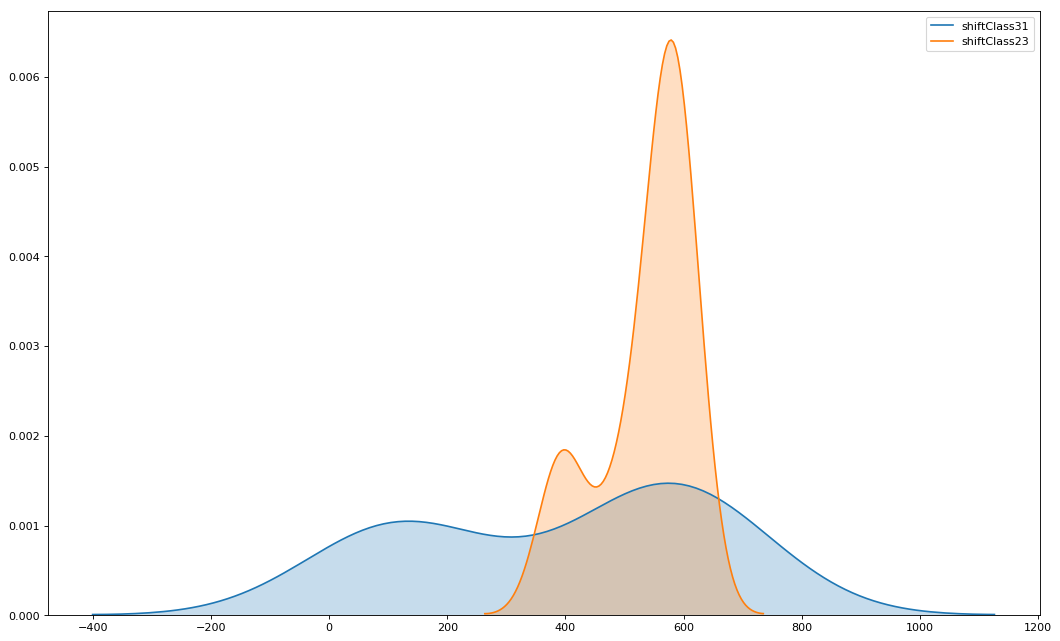

In [5]:
#test_df = pd.read_csv('us_jp_cars.csv')
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
#sn.set_style('whitegrid')
#df['shiftClass31'].dropna().plot(kind = 'density')
#df['shiftClass23'].dropna().plot(kind = 'density')
sn.kdeplot(df['shiftClass31'].dropna(), shade=True)
sn.kdeplot(df['shiftClass23'].dropna(), shade=True)
#sn.kdeplot(test_df['us_mpg'].dropna(), shade=True)
#sn.kdeplot(test_df['jp_mpg'].dropna(), shade=True)
#sn.distplot(df['shiftClass31'].dropna(), hist=False, rug=True)
#sn.distplot(df['shiftClass23'].dropna(), hist=False, rug=True)
plt.show()

This is a kernel density plot between `{{featureCombos[2][0]}}` and `{{featureCombos[2][1]}}`. Taking a look at the plot, it seems that the two variables have very different value ranges. 

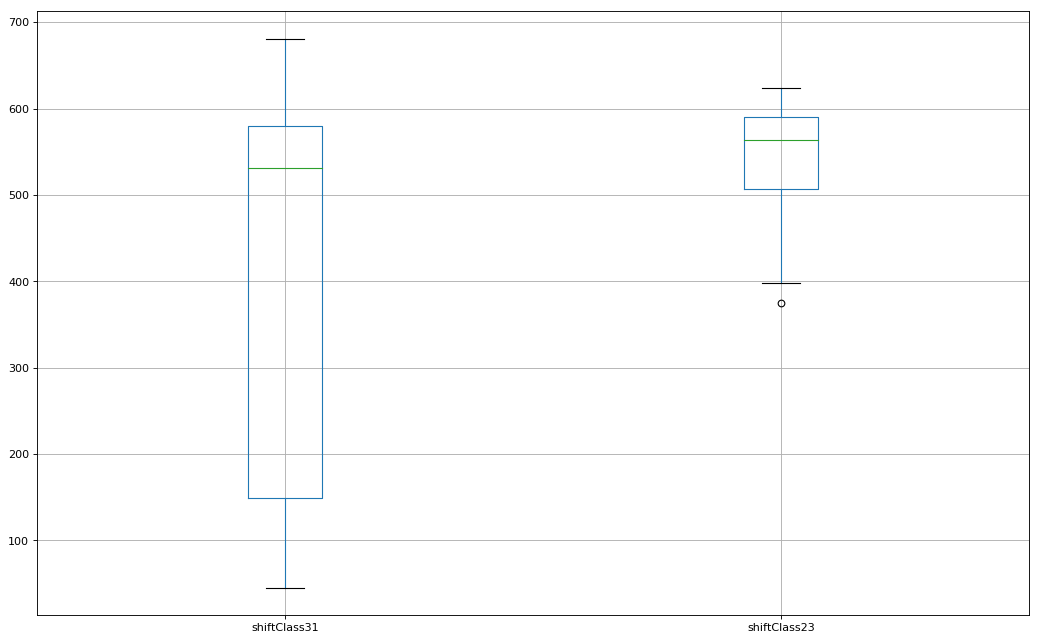

In [6]:
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
df.boxplot(column=['shiftClass31', 'shiftClass23'])
plt.show()
#ax = sn.boxplot(df['shiftClass31'].dropna())

In [8]:
if 'shiftClass21' in df.columns:
    print df[['shiftClass21']]

    shiftClass21
0        524.996
1        587.324
2        630.496
3        539.347
4        500.332
5        283.492
6        372.994
7        552.625
8        534.994
9        499.706
10       550.000
11       550.540
12       389.700
13       525.348
14       522.163
15       500.198
16       531.916
17       603.464
18       633.839
19       611.398
20       609.480
21       560.425
22       594.814
23       590.739
24       451.523
25       463.642
26       367.655
27       598.855
28       612.087
29       574.496
30       616.495
31       479.926
32       588.892
33           NaN
34           NaN
35           NaN
36           NaN
